In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.optimize as optimize

In [3]:
import numpy as np
import math

class muon_distribution:
    
    # constructors
    def __init__(self, lifetime):
        self.lifetime = float(lifetime)
        
    # method to return exponential distribution    
    def evaluate_md(self,t):
        return (1/self.lifetime)*math.exp(-t/self.lifetime)
    
    # method to return maximum value of distribution  
    def maximum(self):
        return 1.0/self.lifetime
    
    # method to return random number with distribution
    # choose numpy random exponential or custom code 'calum'    
    def random_val(self,choice='calum'):
        
        # in built numpy method for generating random number in a exponential distribution
        if choice=='numpy':
            x1 = np.random.exponential(scale=self.lifetime)        
        # box method for generating random number in a exponential distribution
        elif choice=='calum':
            x1 = 0 
            y1 = 0
            y2 = 1
        
            while ( y2 > y1 ):
                x1 = np.random.uniform() 
                x1 = x1*self.lifetime*10.
                y1 = self.evaluate_md(x1)
                y2 = np.random.uniform() * self.maximum()
            

        return x1
    
    # integrates area under the curve, in this example should be normalised
    # therefore always roughly equal to 1
    def numeric_integral(self,lo,hi,npoints=100000):
        
        sumf = 0
        
        for i in range(0,npoints):
            x = lo+np.random.uniform()*(hi-lo)
            sumf += self.evaluate_md(x)
            
        return sumf*(hi-lo)/npoints
    
    # performs an observation by taking n_muons random values
    # of the distribution
    def observation(self,choice='numpy',n_muons=10000):
        results = []
        for i in range(0,n_muons):
            results.append(self.random_val(choice=choice))
            
        # average decay time, result list
        return np.mean(results), results

In [11]:
def pdf(tau,t):
    t = np.array(t)
    return (1/tau)*np.exp(-t/tau)

In [4]:
test = muon_distribution(2.2)

In [5]:
val, results = test.observation()  
val

2.1827419087480129

In [15]:
pdf(2.2,results)

array([ 0.09140345,  0.30537689,  0.28319892, ...,  0.34440799,
        0.34833996,  0.22822078])

(0, 20)

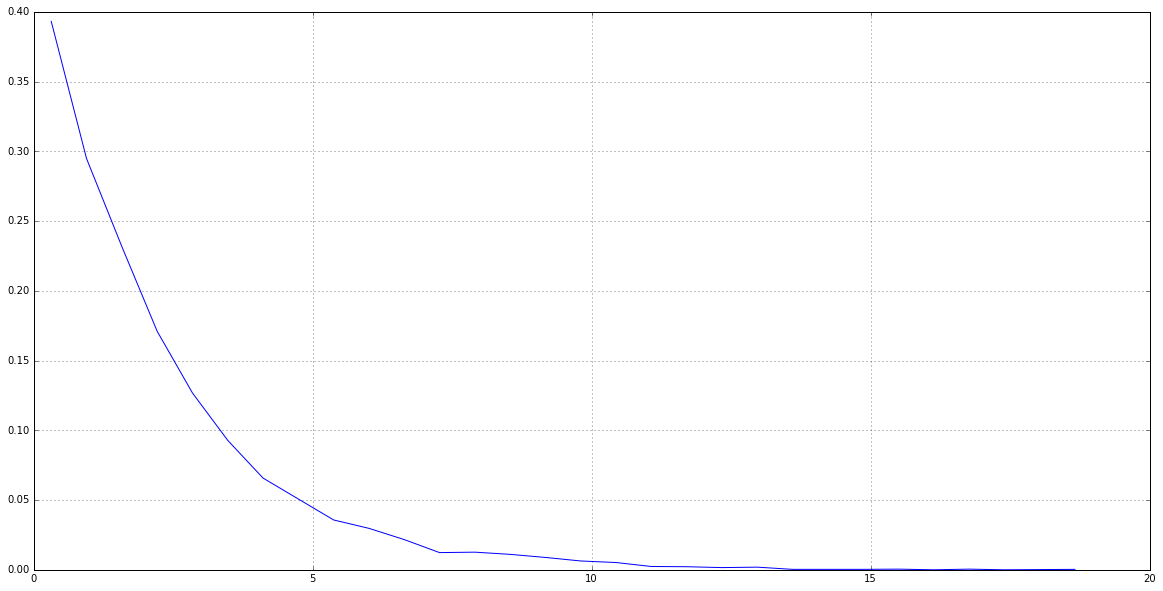

In [20]:
n, bins = np.histogram(results, bins=30, normed=True)

plt.figure(figsize=(20,10))
step = (bins[1]-bins[0])/2
plt.plot(bins[1:]-step,n)
plt.grid(True)
plt.xlim(0,20)

In [21]:
def nll(theta,t):
    t = np.array(t)
    tau = theta
    return -np.sum(np.log((1/tau)*np.exp(-t/tau)))    

In [22]:
for params in [p for p in np.arange(0,10,0.5)]:
    print(params)
    result = optimize.minimize(nll, [params], args=(results),tol=0.001)
    if result['success'] == True:
        break
result

0.0
0.5
1.0


/home/calum/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:4: RuntimeWarning: divide by zero encountered in true_divide
/home/calum/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in multiply
/home/calum/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:4: RuntimeWarning: divide by zero encountered in log
/home/calum/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in log
/home/calum/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in log
/home/calum/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in log


1.5


/home/calum/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in log
/home/calum/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in log


      fun: 17830.907932273196
 hess_inv: array([[ 0.00048013]])
      jac: array([-0.00073242])
  message: 'Optimization terminated successfully.'
     nfev: 48
      nit: 7
     njev: 16
   status: 0
  success: True
        x: array([ 2.18822479])

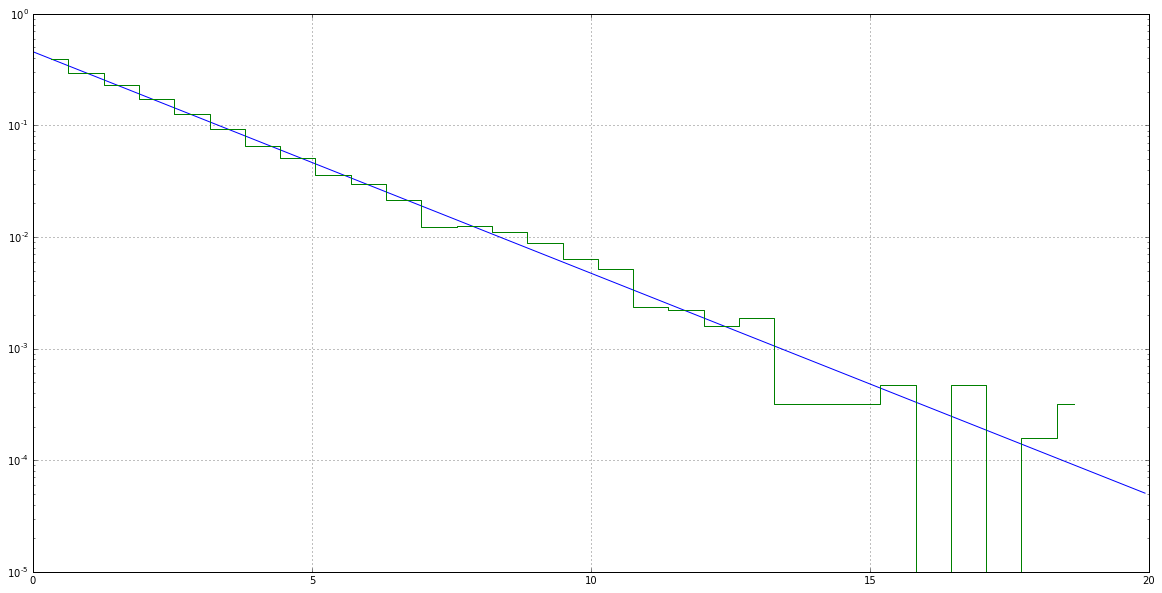

In [26]:
plt.figure(figsize=(20,10))
plt.plot([t for t in np.arange(0,20,step)],[(1/result['x'])*np.exp(-t/result['x']) for t in np.arange(0,20,step)])
step = (bins[1]-bins[0])/2
plt.plot(bins[1:]-step,n,drawstyle='steps-mid')
plt.grid(True)
plt.xlim(0,20)
plt.yscale('log')

In [9]:
np.sum([(1/result['x'])*np.exp(-t/result['x']) for t in np.arange(0,20,step)])

3.1249275899884212

In [14]:
array = [[p1,p2,p3] for p1 in np.arange(0,10,0.8) for p2 in np.arange(0,10,0.8) for p3 in np.arange(0,10,0.8)]
array[-2]

[9.6000000000000014, 9.6000000000000014, 8.8000000000000007]

In [15]:
np.array(array).shape

(2197, 3)